NAME - VARUN MISHRA

SCHOLAR NO - 24215011102

Q- Design a simple neural network with a Batch Normalization layer in the hidden layers, and another without Batch Normalization in the hidden layers. Then, plot a contour plot to visualize the loss landscape during training.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


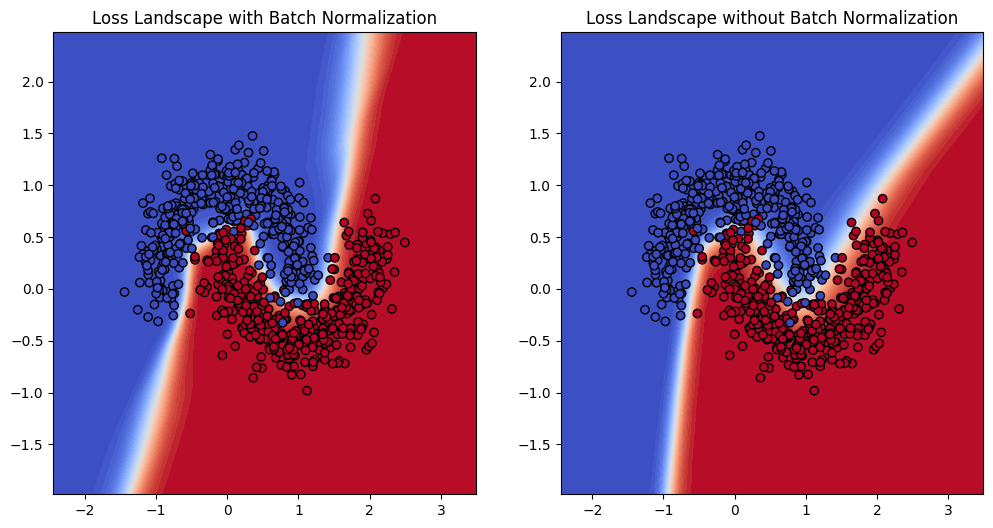

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LambdaCallback

# 1. Generate a simple dataset (make_moons)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build the neural network with Batch Normalization
def create_model_with_batch_normalization():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(2,)))
    model.add(layers.BatchNormalization())  # Batch Normalization layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())  # Batch Normalization layer
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Build the neural network without Batch Normalization
def create_model_without_batch_normalization():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4. Record loss values during training for contour plotting
losses_with_bn = []
losses_without_bn = []

# Define a callback to capture loss during training
def capture_loss_batch_normalization(epoch, logs):
    losses_with_bn.append(logs['loss'])

def capture_loss_without_bn(epoch, logs):
    losses_without_bn.append(logs['loss'])

# Create and train models
model_with_bn = create_model_with_batch_normalization()
model_without_bn = create_model_without_batch_normalization()

# Training the model with Batch Normalization
loss_callback_bn = LambdaCallback(on_epoch_end=capture_loss_batch_normalization)
history_with_bn = model_with_bn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[loss_callback_bn], verbose=0)

# Training the model without Batch Normalization
loss_callback_no_bn = LambdaCallback(on_epoch_end=capture_loss_without_bn)
history_without_bn = model_without_bn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[loss_callback_no_bn], verbose=0)

# 5. Plotting the loss landscape (Contour plot)
# Create a grid to evaluate the loss
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Loss for model with batch normalization
z_bn = model_with_bn.predict(grid)
z_bn = z_bn.reshape(xx.shape)

# Loss for model without batch normalization
z_no_bn = model_without_bn.predict(grid)
z_no_bn = z_no_bn.reshape(xx.shape)

# 6. Plotting the contour plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Model with Batch Normalization
ax[0].contourf(xx, yy, z_bn, levels=np.linspace(0, 1, 50), cmap='coolwarm')
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o')
ax[0].set_title('Loss Landscape with Batch Normalization')

# Model without Batch Normalization
ax[1].contourf(xx, yy, z_no_bn, levels=np.linspace(0, 1, 50), cmap='coolwarm')
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o')
ax[1].set_title('Loss Landscape without Batch Normalization')

plt.show()
